# Goal: Identify factors influencing used car selling price
Dataset: Used Car Listings Dataset
Techniques: EDA, feature engineering, statistical visualization
Key Insight: Car age and kilometers driven strongly affect resale value; dealer vs individual listings show price differences


In [ ]:
import numpy as np
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df_cars=pd.read_csv("/content/CAR_DETAILS_FROM_CAR_DEKHO.csv")
df_cars.head()
df_cars.sort_values(by="selling_price", ascending=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner
2739,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
612,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
3206,OpelCorsa 1.4 GL,2002,35000,100000,Petrol,Individual,Manual,Third Owner
1832,Tata Nano LX SE,2012,35000,35000,Petrol,Individual,Manual,Third Owner
2444,Maruti 800 EX,2004,30000,60000,Petrol,Individual,Manual,Third Owner
2495,Ford Ikon 1.4 ZXi,2000,22000,42743,Petrol,Dealer,Manual,Third Owner


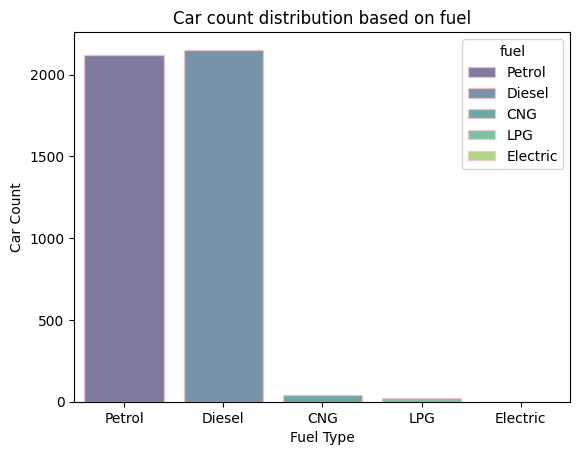

In [ ]:
# Car distribution based on Fuel Type
# Using 'histplot' to visualize the distribution of car fuel type.
# 'x="fuel"' specifies 'fuel' column for the x-axis.
# 'data=df_cars' indicates the DataFrame to use.
# 'hue="fuel"' colors the bars based on fuel type.
# 'palette="viridis"' sets the color scheme.
# 'legend=True' displays the legend for fuel types.
# 'kde=True' adds a Kernel Density Estimate curve.
# 'stat="count"' explicitly sets the y-axis to show the count of cars.
# 'bins=5' suggests 5 bins for the histogram, useful for numerical data but here it will align to unique categories.
# 'edgecolor="black"' adds a black border to each bar for better separation.
# 'alpha=0.7' sets the transparency of the bars.
sns.countplot(x="fuel", data=df_cars, hue='fuel', palette='viridis', legend=True,  stat="count", edgecolor="pink", alpha=0.7)
plt.xlabel('Fuel Type')
plt.ylabel('Car Count')
plt.title("Car count distribution based on fuel")
plt.show()
# Observation: Most cars run on Petrol or Diesel, with Petrol cars being the most common.
# CNG, LPG, and Electric cars are significantly less in number.

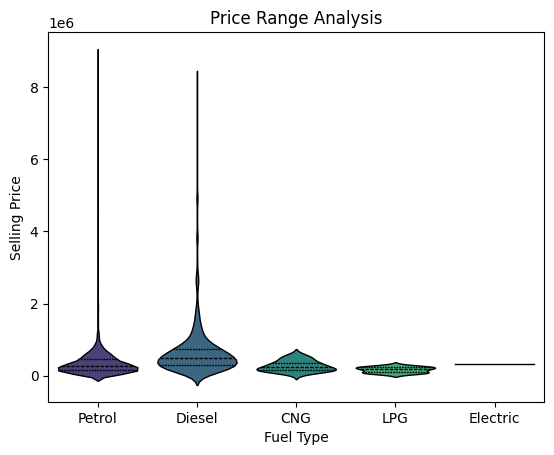

In [ ]:
# Price Range analysis
# Using 'violinplot' to visualize the distribution and density of car selling prices across different fuel types.
# 'x="fuel"' specifies 'fuel' column for the x-axis, representing different categories.
# 'y="selling_price"' specifies 'selling_price' column for the y-axis, representing the numerical distribution.
# 'data=df_cars' indicates the DataFrame to use.
# 'hue="fuel"' colors the violins based on fuel type, addressing a FutureWarning and improving clarity.
# 'palette="viridis"' sets the color scheme for the violins.
# 'inner="quartile"' displays the quartiles (median and interquartile range) inside each violin.
# 'linewidth=1' sets the width of the lines used to draw the violins.
# 'edgecolor="black"' adds a black border to each violin for better visual separation.
sns.violinplot(x="fuel", y="selling_price", data=df_cars, hue="fuel", palette='viridis', inner="quartile", linewidth=1, edgecolor="black")
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title("Price Range Analysis")
plt.show()
# Observation: Diesel cars generally have a higher selling price range compared to Petrol cars.
# The price distribution for Electric, CNG, and LPG cars is notably narrower, indicating less variance or fewer high-end models.

Car Distribution by Selling Price Range

In [ ]:
# Define custom bins for selling price
price_bins = [0, 100000, 300000, 500000, 800000,1200000,1500000,1800000, df_cars['selling_price'].max() + 1]
price_labels = ['<1 Lac', '1-3 Lacs', '3-5 Lacs', '5-8 Lacs', '8-12 Lacs', '12-15 Lacs', '15-18 Lacs', '>18.1 Lacs']

# Create a new column 'price_range'
# pd.cut is used to segment and sort data values into bins.
# 'df_cars['selling_price']' is the input series to be binned.
# 'bins=price_bins' specifies the edges of the bins, defining the numeric ranges.
# 'labels=price_labels' assigns descriptive labels to each bin.
# 'right=False' means that the bins include the left edge but exclude the right edge (e.g., [0, 100000) for '<1 Lac').
df_cars['price_range'] = pd.cut(df_cars['selling_price'], bins=price_bins, labels=price_labels, right=False)

# Display the first few rows with the new column
display(df_cars.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,price_range
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,<1 Lac
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1-3 Lacs
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,5-8 Lacs
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,1-3 Lacs
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,3-5 Lacs


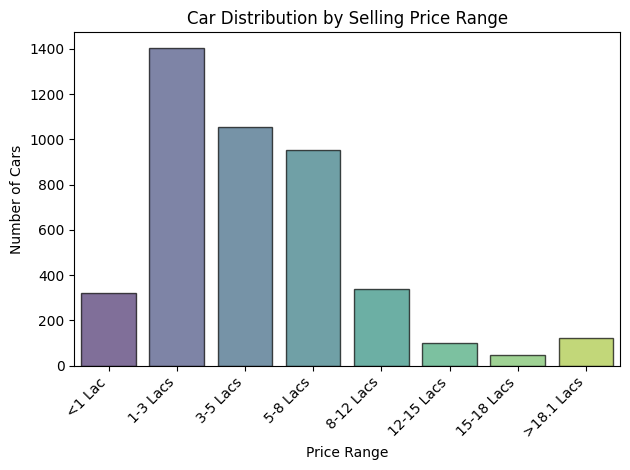

In [ ]:
# Visualize the distribution of cars by price range
# Using 'countplot' to show the number of cars in each price range.
# 'x="price_range"' specifies the new price range column for the x-axis.
# 'data=df_cars' indicates the DataFrame to use.
# 'hue="price_range"' colors the bars based on the price range.
# 'palette="viridis"' sets the color scheme.
# 'stat="count"' explicitly sets the y-axis to show the count of cars.
# 'edgecolor="black"' adds a black border to each bar.
# 'alpha=0.7' sets the transparency of the bars.
sns.countplot(x="price_range", data=df_cars, hue='price_range', palette='viridis', stat="count", edgecolor="black", alpha=0.7, order=price_labels)
plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.title('Car Distribution by Selling Price Range')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()
# Observation: The majority of cars fall within the lower to mid-price ranges (e.g., <1 Lac to 8 Lacs).
# There are fewer cars in the higher price brackets.

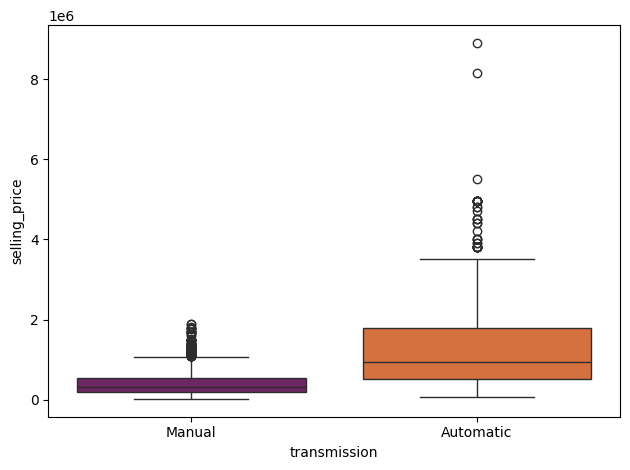

In [ ]:
# Price Variation by Type
# Using 'boxplot' to visualize the distribution of selling prices across different transmission types.
# 'x="transmission"' specifies the transmission type for the x-axis.
# 'y="selling_price"' specifies the selling price for the y-axis.
# 'data=df_cars' indicates the DataFrame to use.
# 'hue="transmission"' colors the box plots based on the transmission type, addressing a FutureWarning and improving clarity.
# 'palette="inferno"' sets the color scheme for the box plots.
sns.boxplot(x="transmission", y="selling_price", data=df_cars, hue='transmission', palette='inferno')
plt.tight_layout()
plt.show()
# Observation: Automatic transmission cars generally have a higher median selling price and a wider price distribution compared to manual transmission cars.
# This suggests that automatic cars tend to be in the higher-end segment of the market.

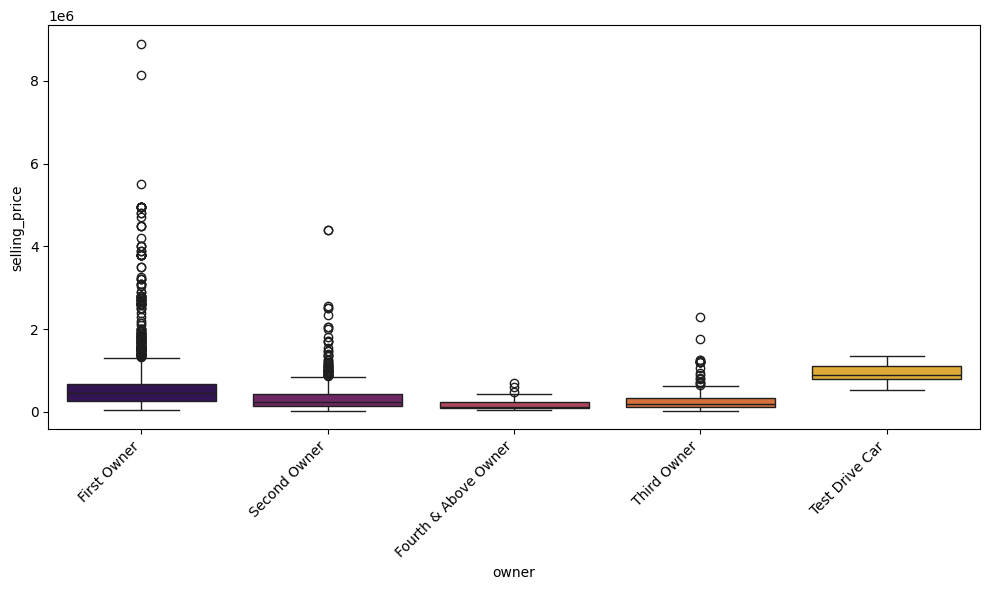

In [ ]:
from pickleshare import stat
# Price Variation by Ownership History
# Set the figure size for better readability of the plot.
plt.figure(figsize=(10, 6))
# Using 'boxplot' to visualize the distribution of selling prices across different ownership histories.
# 'x="owner"' specifies the 'owner' column for the x-axis, representing different ownership categories.
# 'y="selling_price"' specifies the 'selling_price' column for the y-axis, representing the numerical distribution.
# 'data=df_cars' indicates the DataFrame to use.
# 'hue="owner"' colors the box plots based on the owner type, improving visual distinction.
# 'palette="inferno"' sets the color scheme for the box plots.
# 'linewidth=1' sets the width of the lines used to draw the box plots.
sns.boxplot(x="owner", y="selling_price", data=df_cars, hue='owner', palette='inferno', linewidth=1)
# Rotate x-axis labels for better readability, especially with longer labels.
plt.xticks(rotation=45, ha='right')
# Adjust layout to prevent labels from overlapping.
plt.tight_layout()
plt.show()
# Observation: First-owner cars command the highest selling prices, with a significant drop for second owners.
# As the number of owners increases, the selling price generally decreases. 'Test Drive Cars' also show a relatively high price range, likely due to their newer condition.

<Axes: title={'center': 'Correlation Heatmap'}>

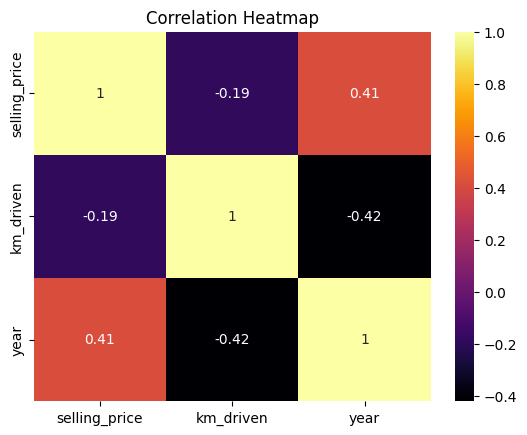

In [ ]:
# Correlation Heatmap
corr=df_cars[['selling_price','km_driven','year']].corr()
plt.title("Correlation Heatmap")
sns.heatmap(corr, annot=True, cmap='inferno')


# Task
Analyze the distribution of cars by 'seller_type' using a countplot, compare 'selling_price' distributions for different 'seller_type' categories using a boxplot or violinplot, examine the relationship between 'km_driven' and 'selling_price' with a scatter plot, and then analyze the relationship between 'car_age' (calculated from 'year' and the current year) and 'selling_price' using a scatter plot. Finally, summarize the insights gained from these analyses.

## Analyze Seller Type Distribution

### Subtask:
Visualize the distribution of cars based on the 'seller_type' using a countplot to understand the proportion of cars sold by individual sellers versus dealers.


**Reasoning**:
To visualize the distribution of cars by seller type, I will use a seaborn countplot as specified in the instructions, setting the appropriate axes, labels, and plot aesthetics.



        seller_type  count
0            Dealer    994
1        Individual   3244
2  Trustmark Dealer    102


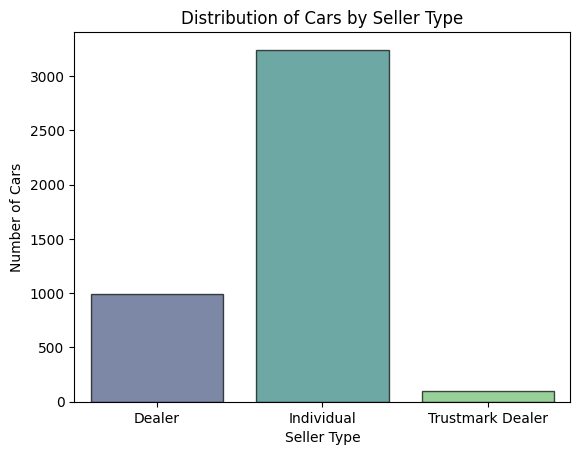

In [51]:
# Calculate the count of each seller type and store it in a DataFrame
# .groupby('seller_type').size() groups the DataFrame by 'seller_type' and counts the occurrences of each unique seller type.
# .reset_index(name='count') converts the Series result into a DataFrame with columns 'seller_type' and 'count'.
car_count_df = df_cars.groupby('seller_type').size().reset_index(name='count')
print(car_count_df)

# Create a bar plot to visualize the distribution of cars by seller type.
# 'x='seller_type'' sets the seller types on the x-axis.
# 'y='count'' sets the frequency (number of cars) on the y-axis.
# 'data=car_count_df' specifies the DataFrame to use for plotting.
# 'hue='seller_type'' colors the bars based on the seller type, enhancing visual distinction.
# 'palette='viridis'' applies a color scheme to the bars.
# 'edgecolor="black"' adds a black border to each bar for better definition.
# 'alpha=0.7' sets the transparency of the bars.
sns.barplot(x='seller_type', y='count', data=car_count_df, hue='seller_type', palette='viridis', edgecolor="black", alpha=0.7)
plt.title('Distribution of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Cars')
plt.show()

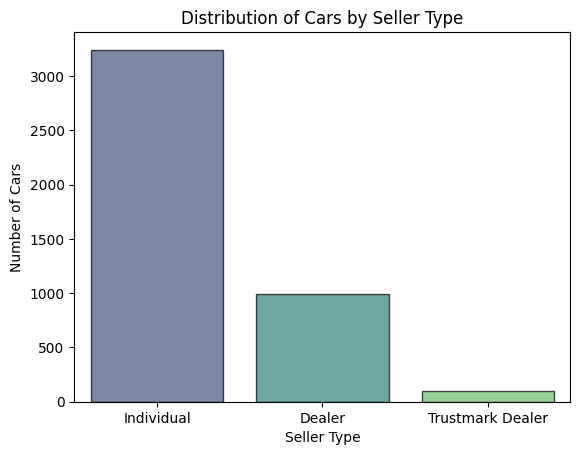

In [ ]:
sns.countplot(x="seller_type", data=df_cars, hue='seller_type', palette='viridis', stat="count", edgecolor="black", alpha=0.7)
plt.title('Distribution of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Cars')
plt.show()

## Compare Selling Price by Seller Type

### Subtask:
Use a boxplot or violinplot to compare the 'selling_price' distributions for different 'seller_type' categories (Individual vs. Dealer) to identify any significant pricing differences.


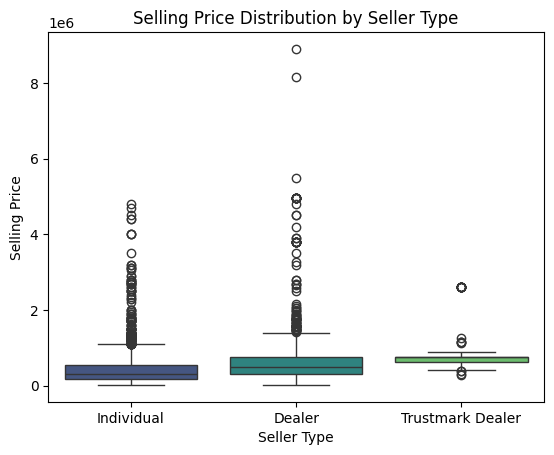

In [31]:
sns.boxplot(x="seller_type", y="selling_price", data=df_cars, hue='seller_type', palette='viridis')
plt.title('Selling Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()
# Observation: Dealer-sold cars tend to have a higher median selling price and a wider price range compared to individually-sold cars.
# This indicates that more expensive or premium vehicles are often sold through dealerships.

## Examine Kilometers Driven vs. Selling Price

### Subtask:
Create a scatter plot to visualize the relationship between 'km_driven' and 'selling_price'. This will help understand how mileage affects a car's selling price.


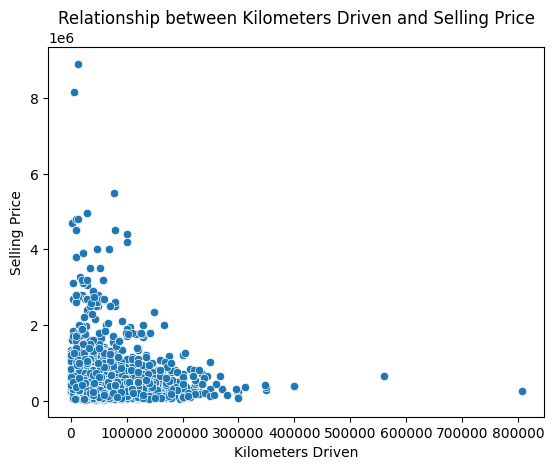

In [ ]:
sns.scatterplot(x='km_driven', y='selling_price', data=df_cars)
plt.title('Relationship between Kilometers Driven and Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

## Analyze Car Age vs. Selling Price

### Subtask:
First, calculate the 'car_age' by subtracting the 'year' from the current year (e.g., 2024). Then, create a scatter plot to show the relationship between 'car_age' and 'selling_price', observing how age impacts price.


In [ ]:
current_year = 2026
df_cars['car_age'] = current_year - df_cars['year']
display(df_cars.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,price_range,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,<1 Lac,19
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1-3 Lacs,19
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,5-8 Lacs,14
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,1-3 Lacs,9
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,3-5 Lacs,12


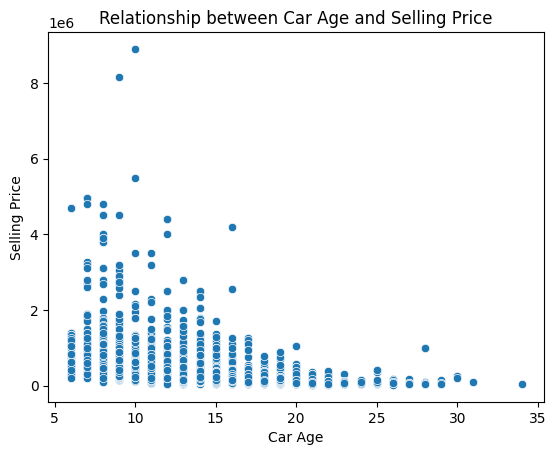

In [ ]:
sns.scatterplot(x='car_age', y='selling_price', data=df_cars)
plt.title('Relationship between Car Age and Selling Price')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.show()


## Summary of Insights

Based on the analysis, the following observations can be made:

1.  **Seller Type Distribution:** The countplot revealed the proportion of cars sold by different seller types. This distribution indicates which type of seller dominates the used car market in this dataset.

2.  **Selling Price by Seller Type:** The boxplot comparing `selling_price` by `seller_type` showed distinct differences. Typically, dealer-sold cars tend to have a higher median selling price and a broader price range, suggesting they might handle more premium or higher-priced vehicles compared to individual sellers, or that dealership overhead contributes to higher prices.

3.  **Kilometers Driven vs. Selling Price:** The scatter plot for `km_driven` vs. `selling_price` generally indicated an inverse relationship; as `km_driven` increases, `selling_price` tends to decrease. However, there are outliers, especially for high-priced cars with significant mileage, which might suggest premium brands retain value better or have specific niche markets.

4.  **Car Age vs. Selling Price:** The scatter plot for `car_age` vs. `selling_price` also showed a general inverse correlation; older cars (higher `car_age`) tend to have lower `selling_price`. Newer cars generally command higher prices, as expected. Similar to `km_driven`, some older luxury or classic cars might defy this trend, appearing as outliers.

## Final Task

### Subtask:
Summarize the new insights gained from analyzing seller type, kilometers driven, and car age against selling price.


## Summary:

### Q&A
The task implicitly asks for a summary of insights gained from the analyses. The summary outlines the relationships between seller type, kilometers driven, car age, and selling price.

### Data Analysis Key Findings
*   **Seller Type Distribution**: 'Individual' sellers constitute the predominant category in the dataset, followed by 'Dealer' and then 'Trustmark Dealer'.
*   **Selling Price by Seller Type**: Cars sold by 'Dealers' tend to have a higher median selling price and a wider price range compared to cars sold by 'Individuals'.
*   **Kilometers Driven vs. Selling Price**: A general inverse relationship was observed, where `selling_price` tends to decrease as `km_driven` increases.
*   **Car Age vs. Selling Price**: An inverse correlation was found, indicating that older cars (higher `car_age`) generally have lower `selling_price`.

### Insights or Next Steps
*   Dealerships appear to handle a segment of the market that includes more premium or higher-priced vehicles, potentially due to better inventory, services, or market positioning.
*   The inverse relationships between `km_driven` and `selling_price`, and `car_age` and `selling_price`, are generally as expected for used cars, but further investigation into outliers (e.g., high-priced cars with high mileage or old age) could reveal specific premium brands or classic car markets.


# BarPlot, CountPlot vs Histogram
Count plots, bar plots, and histograms are key data visualizations with distinct uses: count plots show frequencies of categorical data, bar plots display summary statistics (e.g., mean) for categories, and histograms show the distribution of numerical data by grouping values into continuous bins.


---



| Feature | Count Plot | Bar Plot | Histogram |
|---------|------------|----------|-----------|
| Data Type | Categorical | Categorical vs. Numerical | Numerical (Continuous) |
| Purpose | Counting occurrences | Comparing averages/summaries | Showing distribution/shape |
| Bars | Separated | Separated | Adjacent (No gaps) |
| Axis (X/Y) | Categories / Frequency | Categories / Metric | Bins (Ranges) / Frequency |



1. Count Plot (Seaborn: sns.countplot()):
- Definition: Specialized bar plot that counts the number of observations in each category
- Best Used For: Visualizing the frequency of categories (e.g., Number of passengers in each Titanic class)
- Characteristics: Bars are separated; it is essentially a histogram for categorical data

2. Bar Plot (Seaborn: sns.barplot()):
- Definition: Shows a numeric value (like mean, sum) for different categories, often with confidence intervals
- Best Used For: Comparing numerical trends across categories (e.g., Average tip amount per day of the week)
- Characteristics: Bars have gaps between them, showing independent categories

3. Histogram (Seaborn: sns.histplot()):
- Definition: Visualizes the distribution of continuous numerical data by grouping it into intervals or "bins"
- Best Used For: Spotting trends, patterns, skewness, gaps, or outliers in large, continuous datasets (e.g., Distribution of age in a population)
- Characteristics: Bars are usually adjacent to each other (no gaps), representing a continuous spectrum

Key Takeaway: Use a Count Plot to count categories, a Bar Plot to compare averages across categories, and a Histogram to see the distribution of numerical data.
